# Creating density maps (heatmaps) with DIVAnd
Density maps are created to show the density of observations on a regular grid.
## Packages

In [30]:
using DIVAnd
using Makie, CairoMakie, GeoMakie
using Statistics
using DelimitedFiles
using LinearAlgebra
using Random

## Data
The dataset consists of random observations in a rectangular domain.

In [31]:
NX=100
NY=150
# Box size
LX=100
LY=2000
# Bounding box
xleft=100
ybot=-1000
xright=xleft+LX
ytop=ybot+LY
# For the synthetic case, number of points
NP=200
Random.seed!(1234)
xo=xleft .+ LX*(rand(NP))
xo=xleft .+ LX*(0.5 .+ 0.1*randn(NP))
yo=ybot .+ LY*rand(NP)
yo=ybot .+ LY*(0.45 .+ 0.1*randn(NP))
inflation=ones(Float64,NP)
#test for weights on poins
inflation[yo.>ybot+LY/2].= 1

# Eliminate points out of the box
sel=(xo.>xleft) .& (xo.<xright) .& (yo.>ybot) .& (yo.<ytop)

xo=xo[sel]
yo=yo[sel]
inflation=inflation[sel]

NP=size(xo)[1]

dx=LX/(NX)
dy=LY/(NY)

xg = xleft+dx/2:dx:xleft+LX
yg = ybot+dy/2:dy:ybot+LY
# for pyplot
xp=xleft:dx:xleft+LX
yp = ybot:dy:ybot+LY
maskp,(pmp,pnp),(xip,yip) = DIVAnd.DIVAnd_rectdom(xp,yp)
mask,(pm,pn),(xi,yi)= DIVAnd.DIVAnd_rectdom(xg,yg)

(Bool[1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], ([1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], [0.07499999999999979 0.07499999999999979 … 0.07499999999999979 0.07499999999999979; 0.07499999999999979 0.07499999999999979 … 0.07499999999999979 0.07499999999999979; … ; 0.07499999999999979 0.07499999999999979 … 0.07499999999999979 0.07499999999999979; 0.07499999999999979 0.07499999999999979 … 0.07499999999999979 0.07499999999999979]), ([100.5 100.5 … 100.5 100.5; 101.5 101.5 … 101.5 101.5; … ; 198.5 198.5 … 198.5 198.5; 199.5 199.5 … 199.5 199.5], [-993.3333333333334 -980.0 … 980.0 993.3333333333334; -993.3333333333334 -980.0 … 980.0 993.3333333333334; … ; -993.3333333333334 -980.0 … 980.0 993.3333333333334; -993.3333333333334 -980.0 … 980.0 993.3333333333334]))

## Perform heatmap computation

In [32]:
dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0)

([1.1856815638011841e-9 1.4445848021260327e-9 … 8.067864639723682e-11 6.338454533212202e-11; 1.5909266153332495e-9 1.9689297722528745e-9 … 1.0583517857188953e-10 8.241077497223038e-11; … ; 1.6177909040222362e-9 2.122262920485237e-9 … 1.5321206639198688e-10 1.1636700186221193e-10; 1.3022947681254621e-9 1.6836275485097327e-9 … 1.2036422511982765e-10 9.244057515837181e-11], (4.11022778569823, 77.76452661006262), -10.478240701971515, -4.025611488299713e-5)

### Plot observations and field

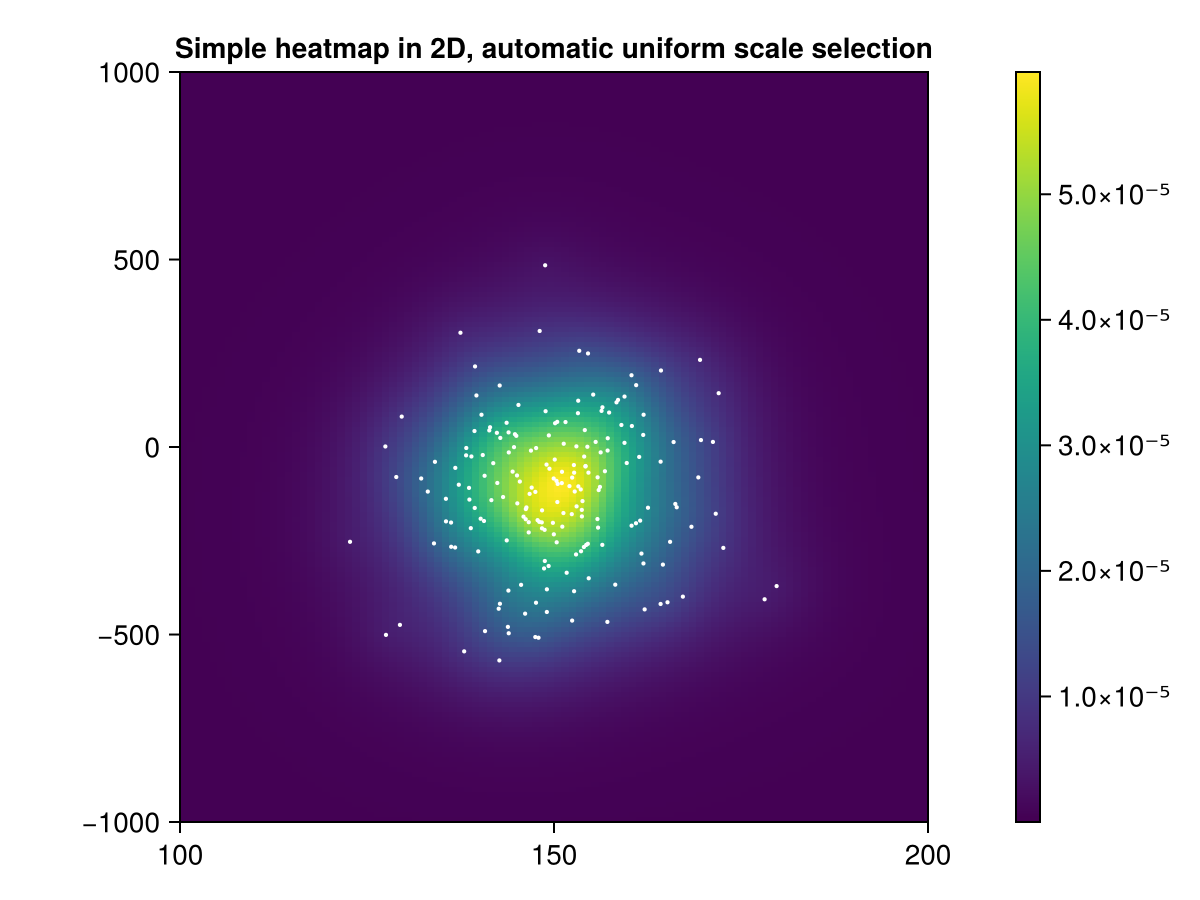

In [33]:
fig = Figure()
ax = Axis(fig[1,1], aspect = 1, title="Simple heatmap in 2D, automatic uniform scale selection")
hm = heatmap!(ax, xip[:,1], yip[1,:], dens2)
scatter!(ax, xo, yo, color=:white, markersize=3)
Colorbar(fig[1,2], hm)
fig

### Adding a wall in the middle

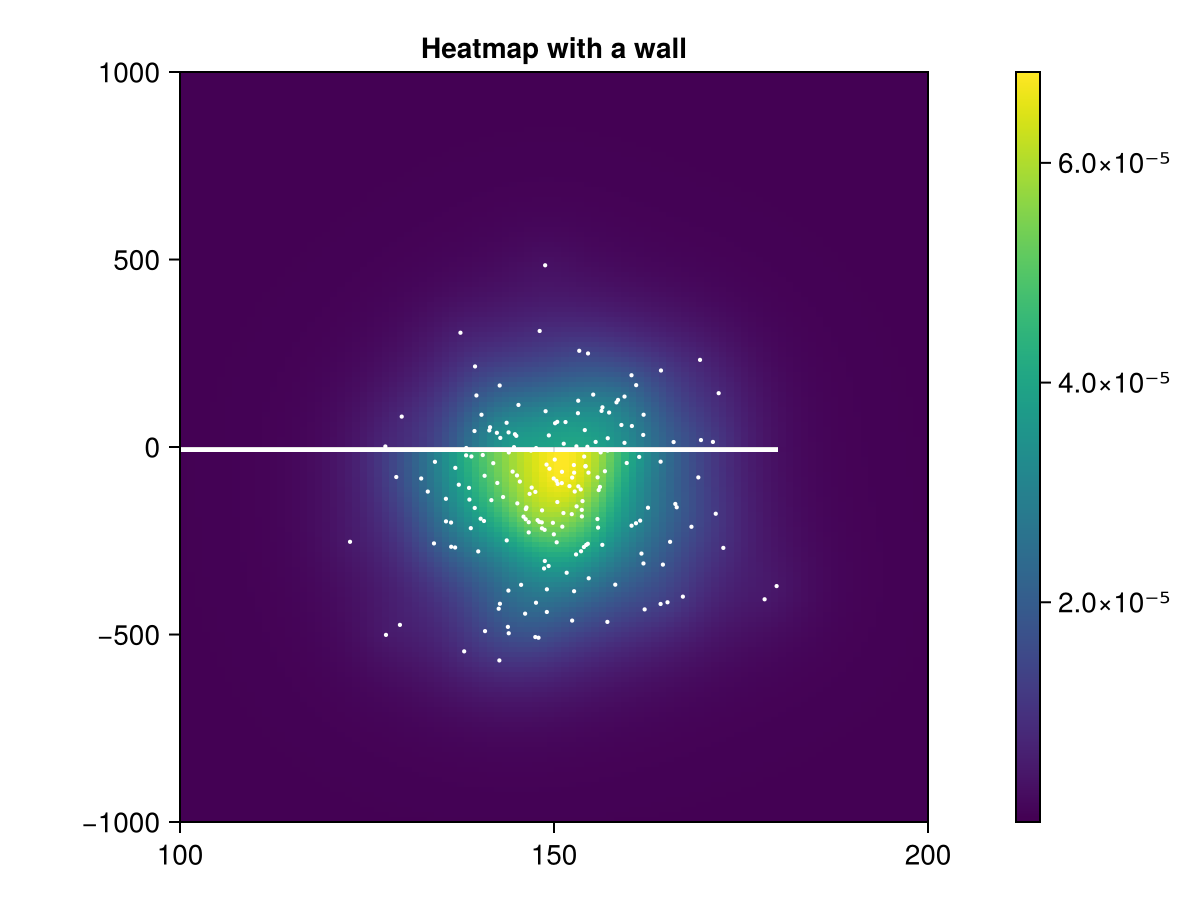

In [4]:
mask[1:80,75].=false

dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0)

fig = Figure()
ax = Axis(fig[1,1], aspect = 1, title="Heatmap with a wall")
hm = heatmap!(ax, xip[:,1], yip[1,:], dens2)
scatter!(ax, xo, yo, color=:white, markersize=3)
Colorbar(fig[1,2], hm)
fig

### Wall in the middle and observations one only one side

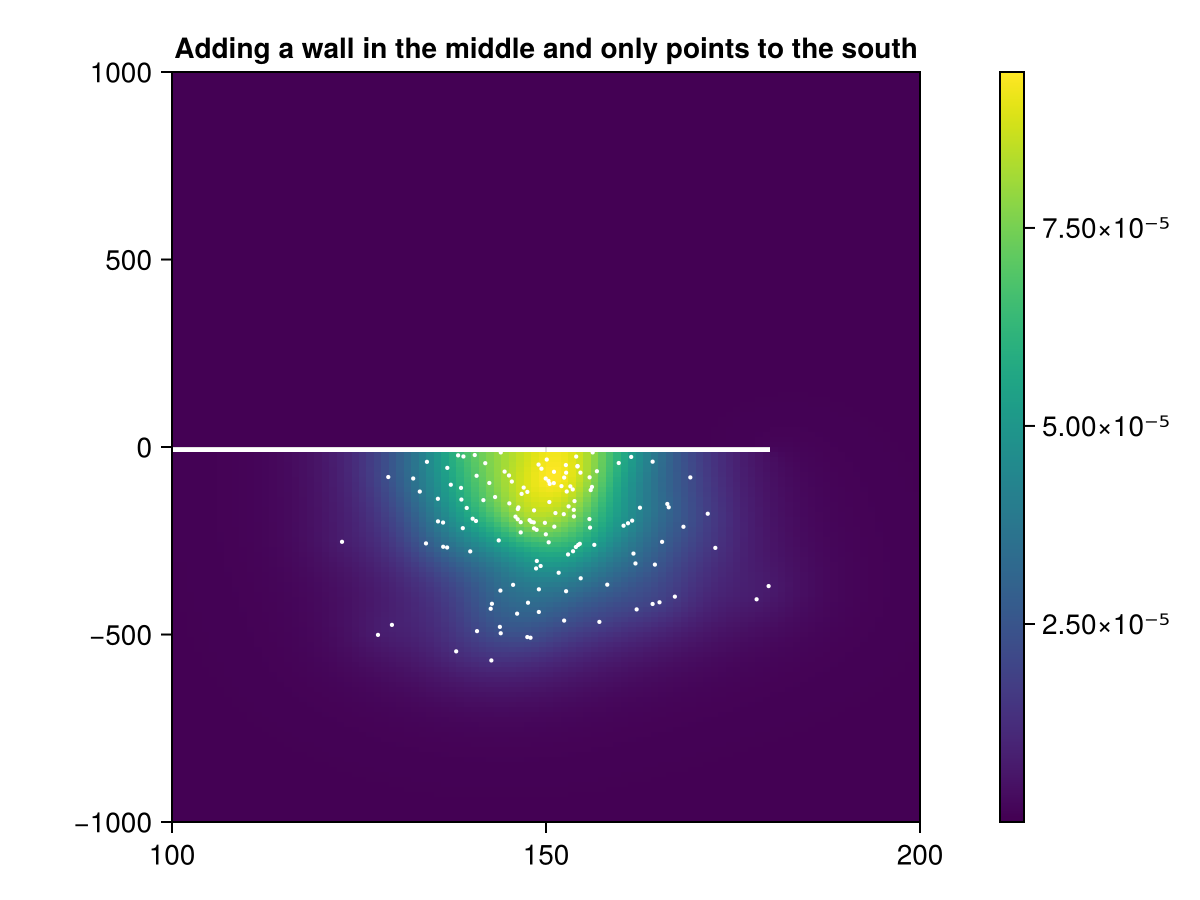

In [5]:
sel= (yo.<-10.)

xo=xo[sel]
yo=yo[sel]
inflation=inflation[sel]
dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0)

fig = Figure()
ax = Axis(fig[1,1], aspect = 1, title="Adding a wall in the middle and only points to the south")
hm = heatmap!(ax, xip[:,1], yip[1,:], dens2)
scatter!(ax, xo, yo, color=:white, markersize=3)
Colorbar(fig[1,2], hm)
fig

In [ ]:
### Open wall in the middle

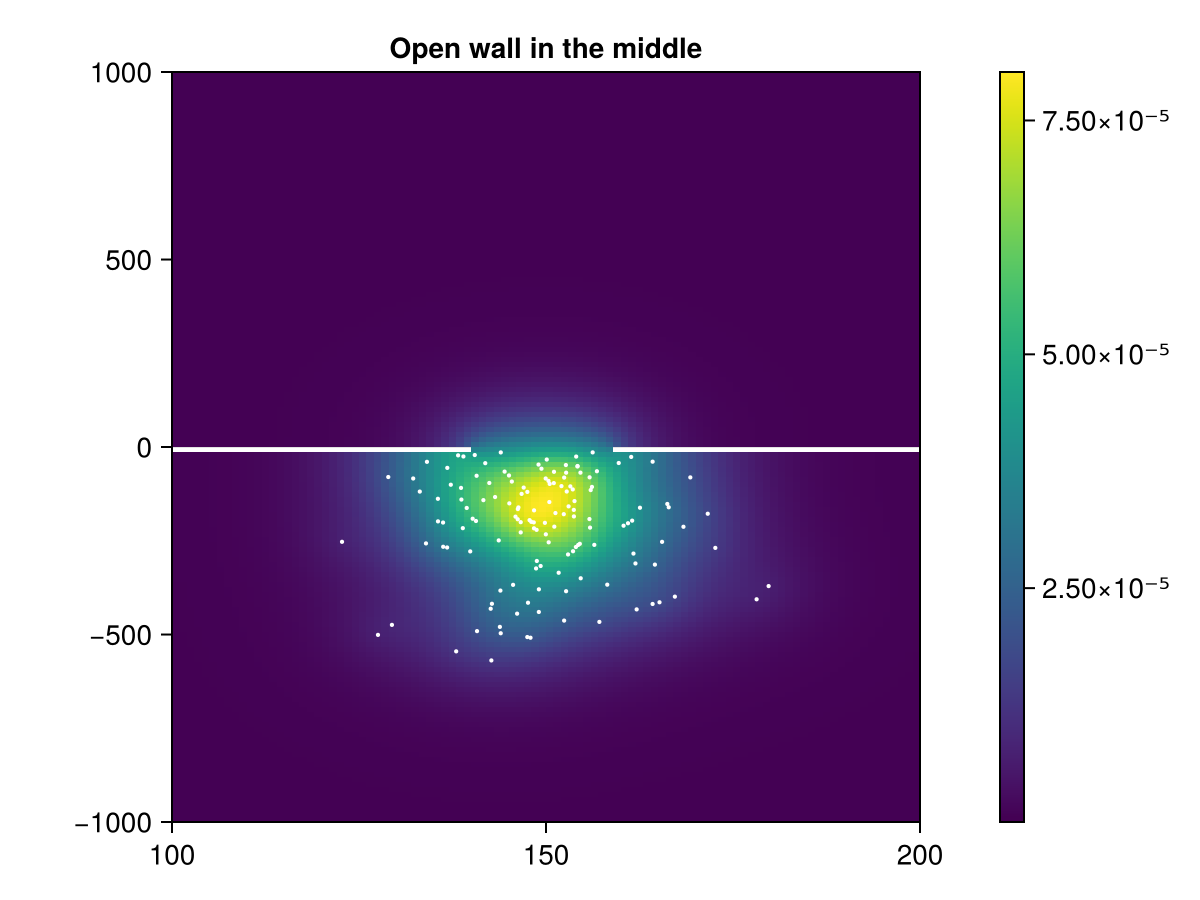

In [6]:
mask.=true
mask[1:40,75].=false
mask[60:end,75].=false
dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0)

fig = Figure()
ax = Axis(fig[1,1], aspect = 1, title="Open wall in the middle")
hm = heatmap!(ax, xip[:,1], yip[1,:], dens2)
scatter!(ax, xo, yo, color=:white, markersize=3)
Colorbar(fig[1,2], hm)
fig

In [ ]:
### Open wall in the middle and increased Ly

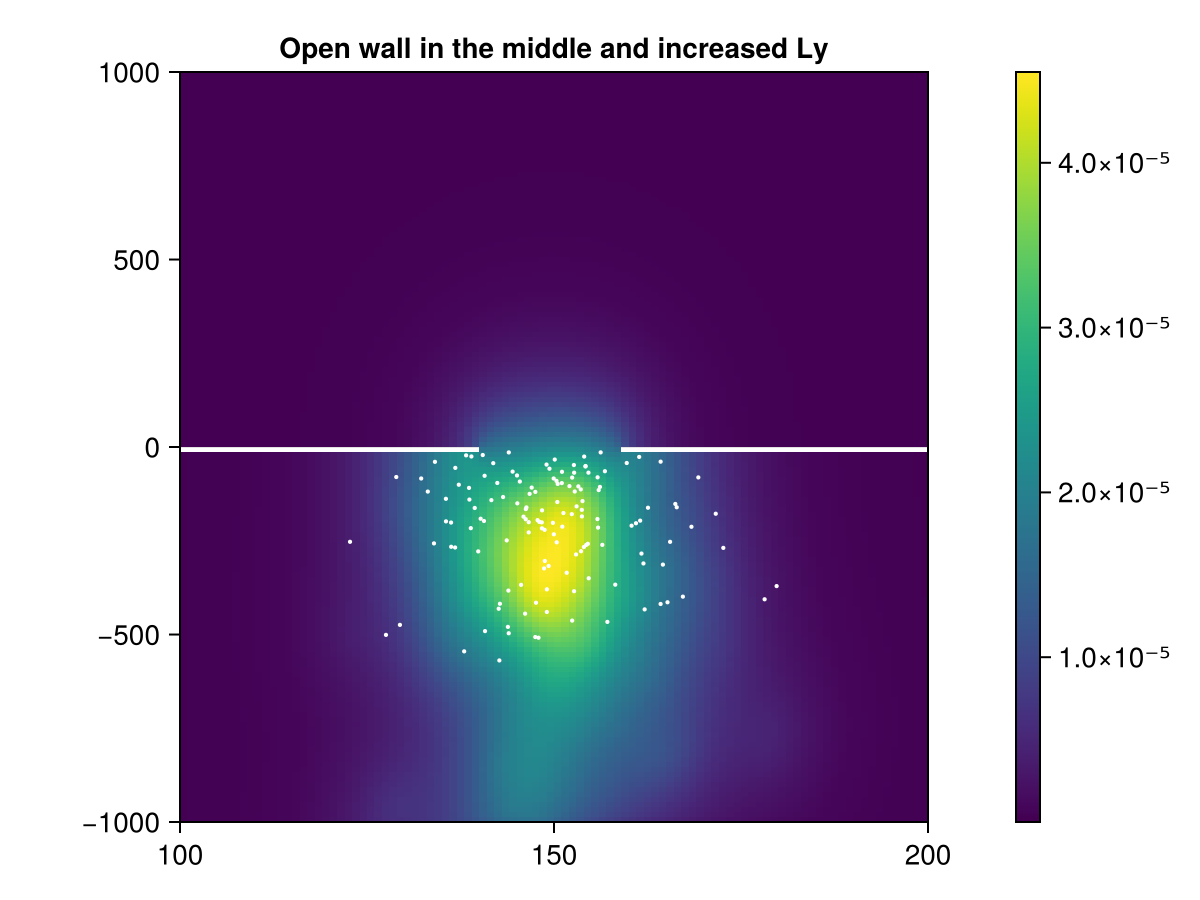

In [7]:
dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,2*yo),inflation,(4,100))

fig = Figure()
ax = Axis(fig[1,1], aspect = 1, title="Open wall in the middle and increased Ly")
hm = heatmap!(ax, xip[:,1], yip[1,:], dens2)
scatter!(ax, xo, yo, color=:white, markersize=3)
Colorbar(fig[1,2], hm)
fig

## 1-dimensional case

In [8]:
NX1D=500
LX1D=8
xleft1D=-4
dx1D=LX1D/(NX1D)

xg1D = xleft1D+dx1D/2:dx1D:xleft1D+LX1D
mask1D,pm1D,xi1D = DIVAnd.DIVAnd_rectdom(xg1D)

xo=randn(1000)
inflation=ones(size(xo))

dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0)
dens1Db,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0,myheatmapmethod="GridKernel",alphabc=0)
dens1Dc,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0,myheatmapmethod="GridKernel",optimizeheat=false,alphabc=0)

gaussiansol=1/sqrt(2*pi)*exp.(-0.5*(xi1D[1].^2.0));

┌ Warning: Method GridKernel does not allow for cross validation. If you need the latter, force myheatmapmethod to DataKernel
└ @ DIVAnd ~/.julia/packages/DIVAnd/4UymR/src/DIVAnd_heatmap.jl:93
┌ Warning: Method GridKernel does not allow for cross validation. If you need the latter, force myheatmapmethod to DataKernel
└ @ DIVAnd ~/.julia/packages/DIVAnd/4UymR/src/DIVAnd_heatmap.jl:93
┌ Warning: Unoptimized versions do not allow for cross validation
└ @ DIVAnd ~/.julia/packages/DIVAnd/4UymR/src/DIVAnd_heatmap.jl:98


### Plot density

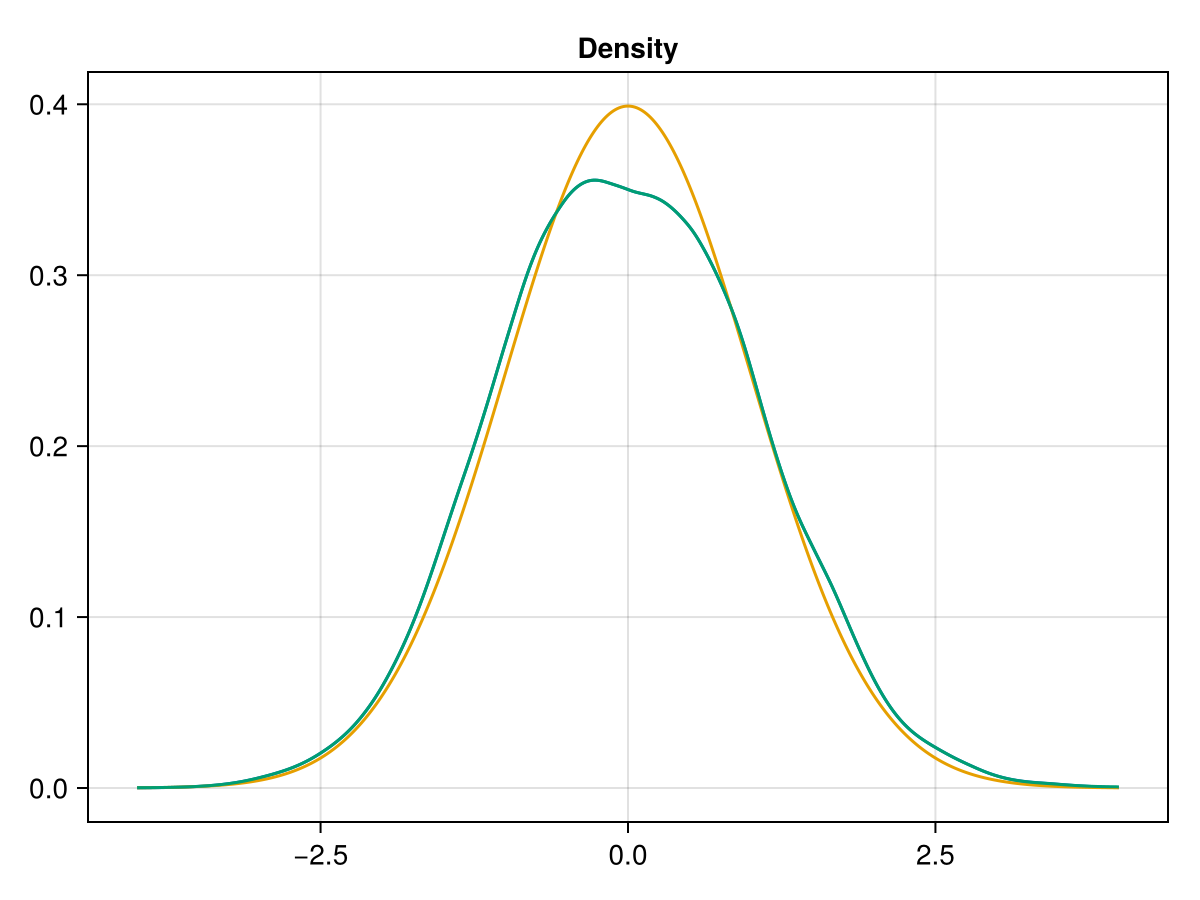

(norm(dens1D - dens1Db), norm(dens1D), norm(dens1Db - dens1Dc), norm(gaussiansol - dens1D)) = (0.001293483453892513, 4.060997852746671, 7.085691846760222e-7, 0.34635268916382583)


In [9]:
fig = Figure()
ax = Axis(fig[1,1], title="Density")
lines!(ax, xi1D[1],dens1D)
lines!(ax, xi1D[1],gaussiansol)
lines!(ax, xi1D[1],dens1Db)
display(fig)
@show norm(dens1D-dens1Db),norm(dens1D),norm(dens1Db-dens1Dc),norm(gaussiansol-dens1D);

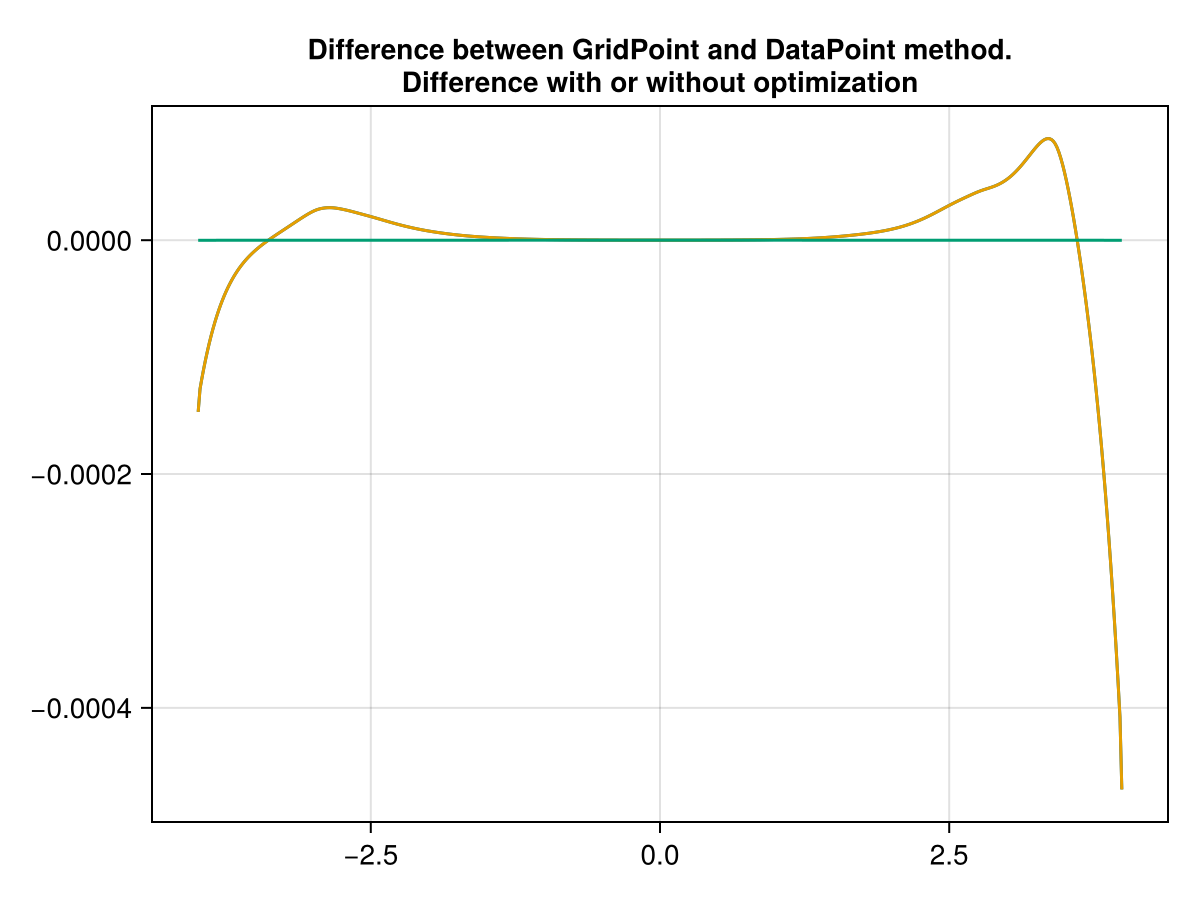

In [10]:
fig = Figure()
ax = Axis(fig[1,1], title="Difference between GridPoint and DataPoint method.\nDifference with or without optimization")
lines!(ax, xi1D[1],dens1D-dens1Db)
lines!(ax, xi1D[1],dens1D-dens1Dc)
lines!(ax, xi1D[1],dens1Db-dens1Dc)
fig

In [11]:
NX1D=500
LX1D=8
xleft1D=-4
dx1D=LX1D/(NX1D)

xg1D = xleft1D+dx1D/2:dx1D:xleft1D+LX1D
mask1D,pm1D,xi1D = DIVAnd.DIVAnd_rectdom(xg1D)

xo=randn(100)
inflation=ones(size(xo))

dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0)
@time dens1D1,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,1;Ladaptiveiterations=1)
@time dens1D1,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,1;Ladaptiveiterations=2)
@time dens1D1nopt,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,1;Ladaptiveiterations=2,optimizeheat=false)
@time dens1D1nopt,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,1;Ladaptiveiterations=2,optimizeheat=false)

gaussiansol=1/sqrt(2*pi)*exp.(-0.5*(xi1D[1].^2.0));

  1.214083 seconds (1.76 M allocations: 112.227 MiB, 99.24% compilation time)
  0.011515 seconds (35.78 k allocations: 38.802 MiB)
  0.354765 seconds (660.67 k allocations: 867.836 MiB, 24.30% gc time, 1.06% compilation time)


┌ Warning: Unoptimized versions do not allow for cross validation
└ @ DIVAnd ~/.julia/packages/DIVAnd/4UymR/src/DIVAnd_heatmap.jl:98


  0.317062 seconds (655.51 k allocations: 867.697 MiB, 18.01% gc time)


┌ Warning: Unoptimized versions do not allow for cross validation
└ @ DIVAnd ~/.julia/packages/DIVAnd/4UymR/src/DIVAnd_heatmap.jl:98


500-element Vector{Float64}:
 0.00013817762908630173
 0.00014727241348370685
 0.00015692563406553226
 0.0001671687907041271
 0.00017803497589104022
 0.00018955894371021315
 0.00020177718110857127
 0.00021472798150036704
 0.00022845152073967242
 0.00024298993549326024
 0.0002583874040437495
 0.0002746902295503157
 0.00029194692579146027
 ⋮
 0.0002746902295503157
 0.0002583874040437495
 0.00024298993549326024
 0.00022845152073967242
 0.00021472798150036704
 0.00020177718110857127
 0.00018955894371021315
 0.00017803497589104022
 0.0001671687907041271
 0.00015692563406553226
 0.00014727241348370685
 0.00013817762908630173

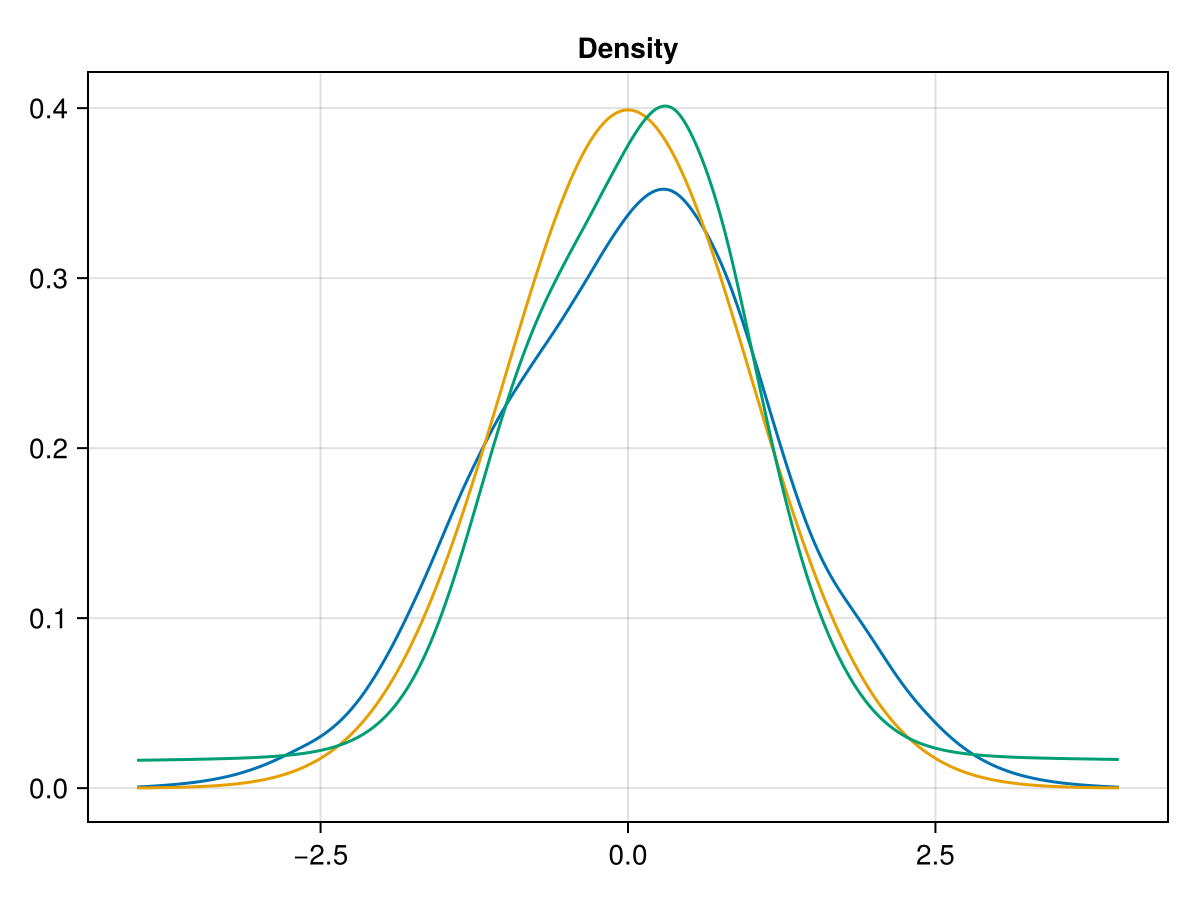

norm(dens1D1 - dens1D1nopt) = 1.1311613481455262e-7


In [12]:
fig = Figure()
ax = Axis(fig[1,1], title="Density")
lines!(ax, xi1D[1],dens1D)
lines!(ax, xi1D[1],gaussiansol)
lines!(ax, xi1D[1],dens1D1)
display(fig)
@show norm(dens1D1-dens1D1nopt);

In [13]:
NSAM=100
CV1=zeros(Float64,NSAM)
CV2=zeros(Float64,NSAM)
BW=zeros(Float64,NSAM)
for jjj=1:NSAM
    HH=0.005*jjj
    dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,HH;Ladaptiveiterations=0)
    @show norm(dens1D-gaussiansol),HH,LCV,LSCV
    CV1[jjj]=LCV
    CV2[jjj]=LSCV
    BW[jjj]=HH
    
end
dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0.195;Ladaptiveiterations=0);
gaussiansol=1/sqrt(2*pi)*exp.(-0.5*(xi1D[1].^2.0));

(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (3.9824068887971897, 0.005, -5.0236474558015365, 0.10451612426573659)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (2.9727427572480094, 0.01, -4.160996700009116, -0.012234596364051775)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (2.3250637308460522, 0.015, -2.7269497228780506, -0.07557038101780861)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (1.9416201514740548, 0.02, -2.9618806158901627, -0.11237860276022849)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (1.6981351782229113, 0.025, -2.279963584016396, -0.13731676142792432)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (1.5318211401675113, 0.03, -2.1182120410576357, -0.15583166582518326)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (1.4115281552825836, 0.035, -2.0028863541677104, -0.17030637272279364)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (1.3205059182809835, 0.04, -1.9167164153840457, -0.18200069521851742)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (1.2490060334935926, 0.0

500-element Vector{Float64}:
 0.00013817762908630173
 0.00014727241348370685
 0.00015692563406553226
 0.0001671687907041271
 0.00017803497589104022
 0.00018955894371021315
 0.00020177718110857127
 0.00021472798150036704
 0.00022845152073967242
 0.00024298993549326024
 0.0002583874040437495
 0.0002746902295503157
 0.00029194692579146027
 ⋮
 0.0002746902295503157
 0.0002583874040437495
 0.00024298993549326024
 0.00022845152073967242
 0.00021472798150036704
 0.00020177718110857127
 0.00018955894371021315
 0.00017803497589104022
 0.0001671687907041271
 0.00015692563406553226
 0.00014727241348370685
 0.00013817762908630173

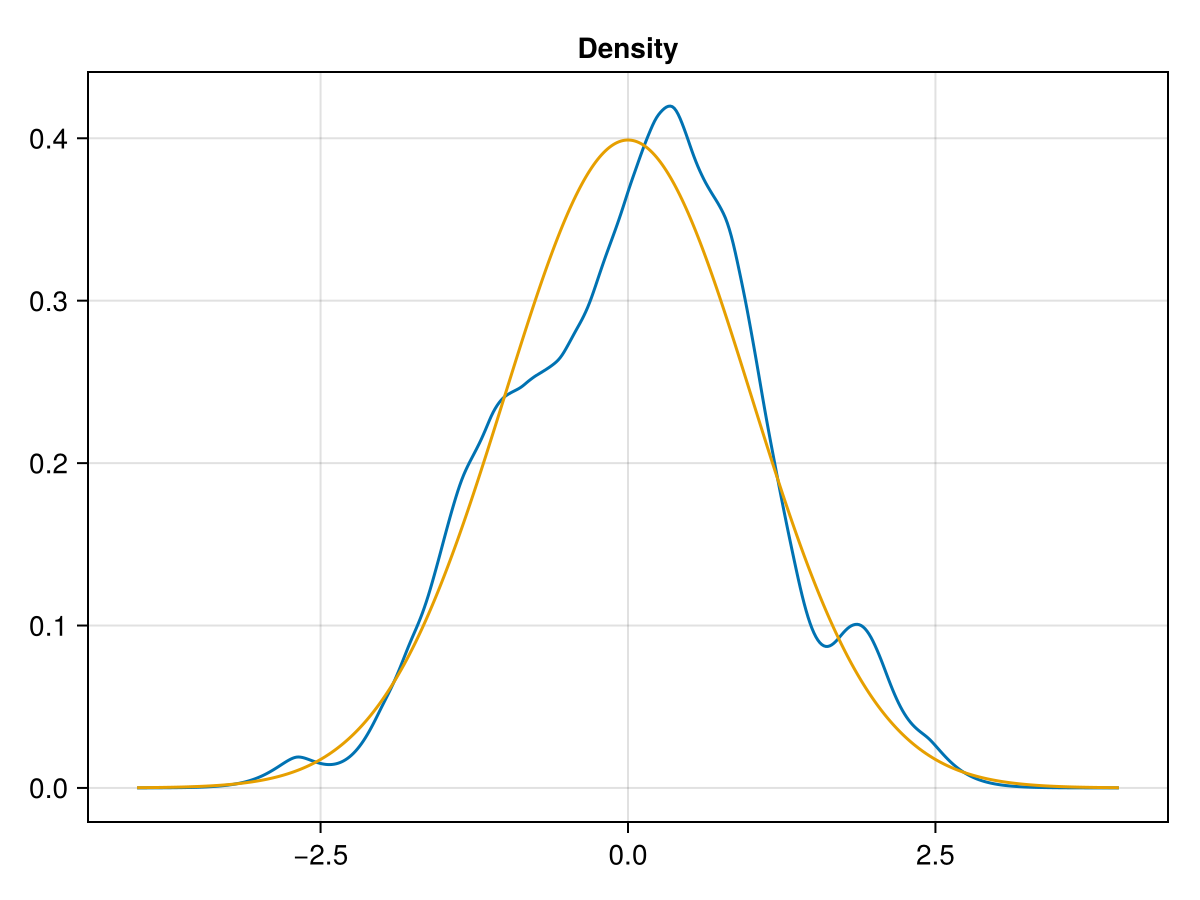

CairoMakie.Screen{IMAGE}


In [14]:
fig = Figure()
ax = Axis(fig[1,1], title="Density")
lines!(ax, xi1D[1],dens1D)
lines!(ax, xi1D[1],gaussiansol)
display(fig)

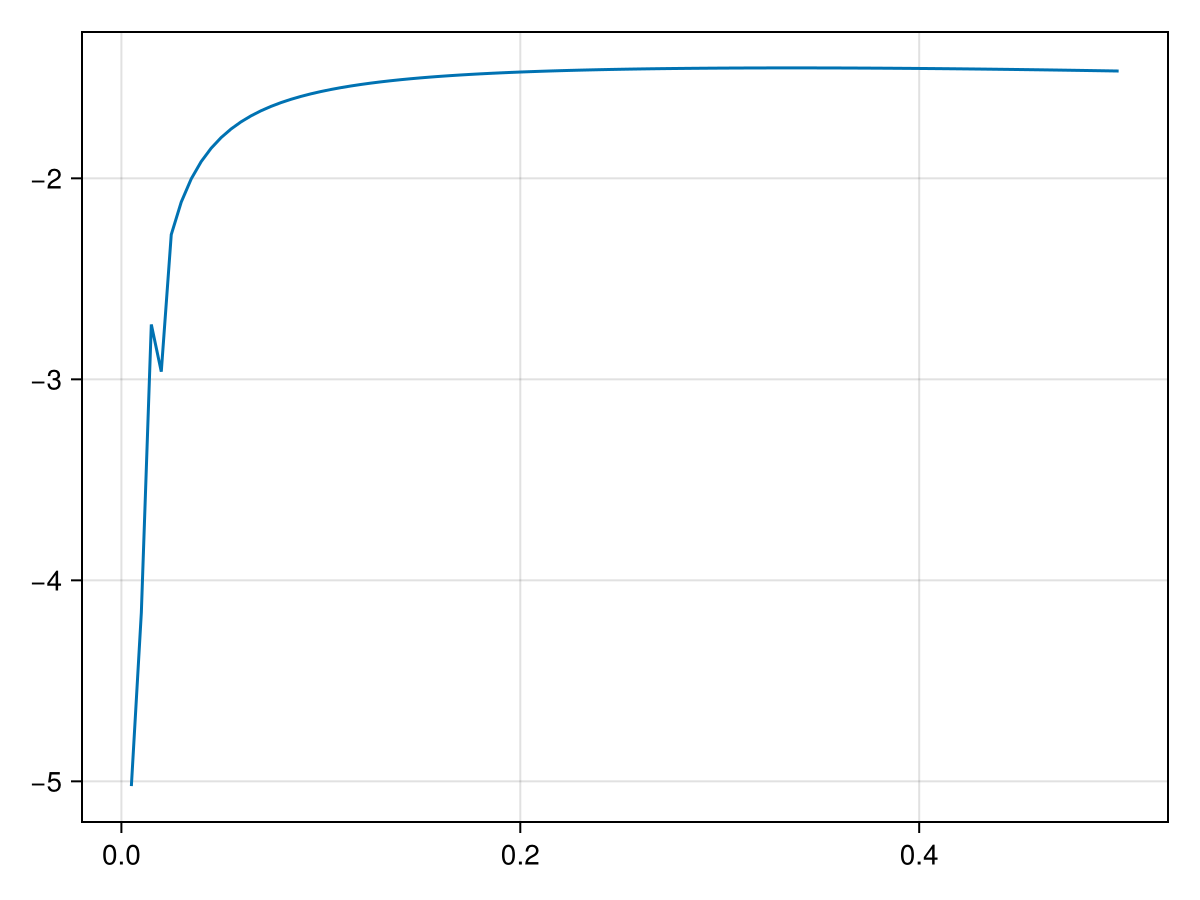

In [15]:
lines(BW,CV1)

In [16]:
BW[findmax(CV1)[2]]

0.335

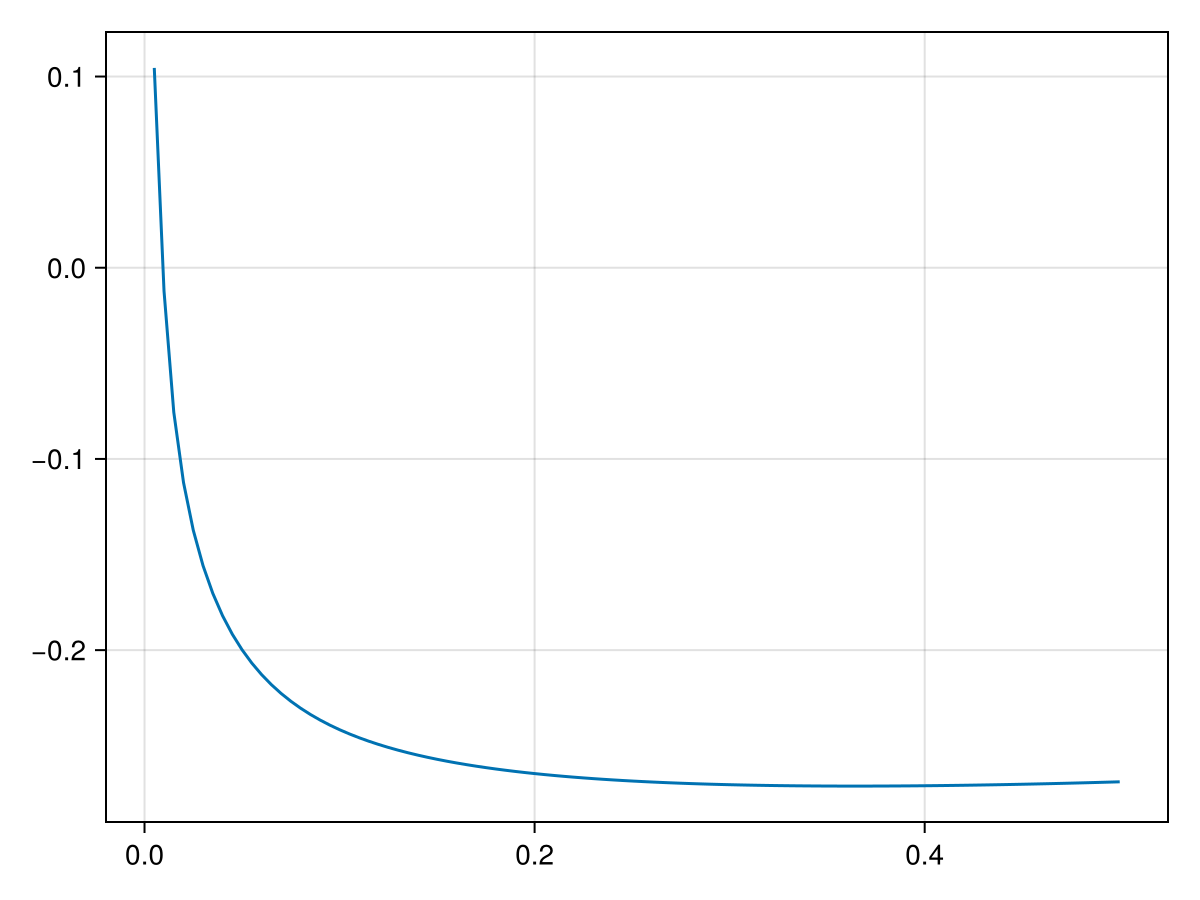

In [17]:
lines(BW,CV2)

In [18]:
BW[findmin(CV2)[2]]

0.365

In [19]:
findmin(CV2)

(-0.2711275605821014, 73)

In [20]:
NX1D=500
LX1D=20
xleft1D=-10
dx1D=LX1D/(NX1D)

xg1D = xleft1D+dx1D/2:dx1D:xleft1D+LX1D
mask1D,pm1D,xi1D = DIVAnd.DIVAnd_rectdom(xg1D)

xa=randn(100).+4
xb=2*randn(100).-4.
xo=[xa...,xb...]

inflation=ones(size(xo))

dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0)
dens1D1,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=4)

gaussiansol=0.5/sqrt(2*pi)*exp.(-0.5*((xi1D[1].-4).^2.0))+0.5/(2*sqrt(2*pi))*exp.(-0.5*(((xi1D[1].+4)./2).^2.0));

500-element Vector{Float64}:
 0.001141647488667536
 0.0012117582264947382
 0.0012856602307634848
 0.0013635238087641387
 0.0014455247214173682
 0.0015318442239559233
 0.001622669097748341
 0.0017181916726534945
 0.0018186098392853046
 0.0019241270505593328
 0.0020349523118865054
 0.0021513001593749213
 0.0022733906253977632
 ⋮
 4.3191243099272805e-8
 3.457950371283708e-8
 2.764063502425686e-8
 2.2058887845599228e-8
 1.757622842946473e-8
 1.3982164449779521e-8
 1.1105291137190349e-8
 8.806280695689863e-9
 6.9720801009383944e-9
 5.511118460325734e-9
 4.349356044966522e-9
 3.4270335496255215e-9

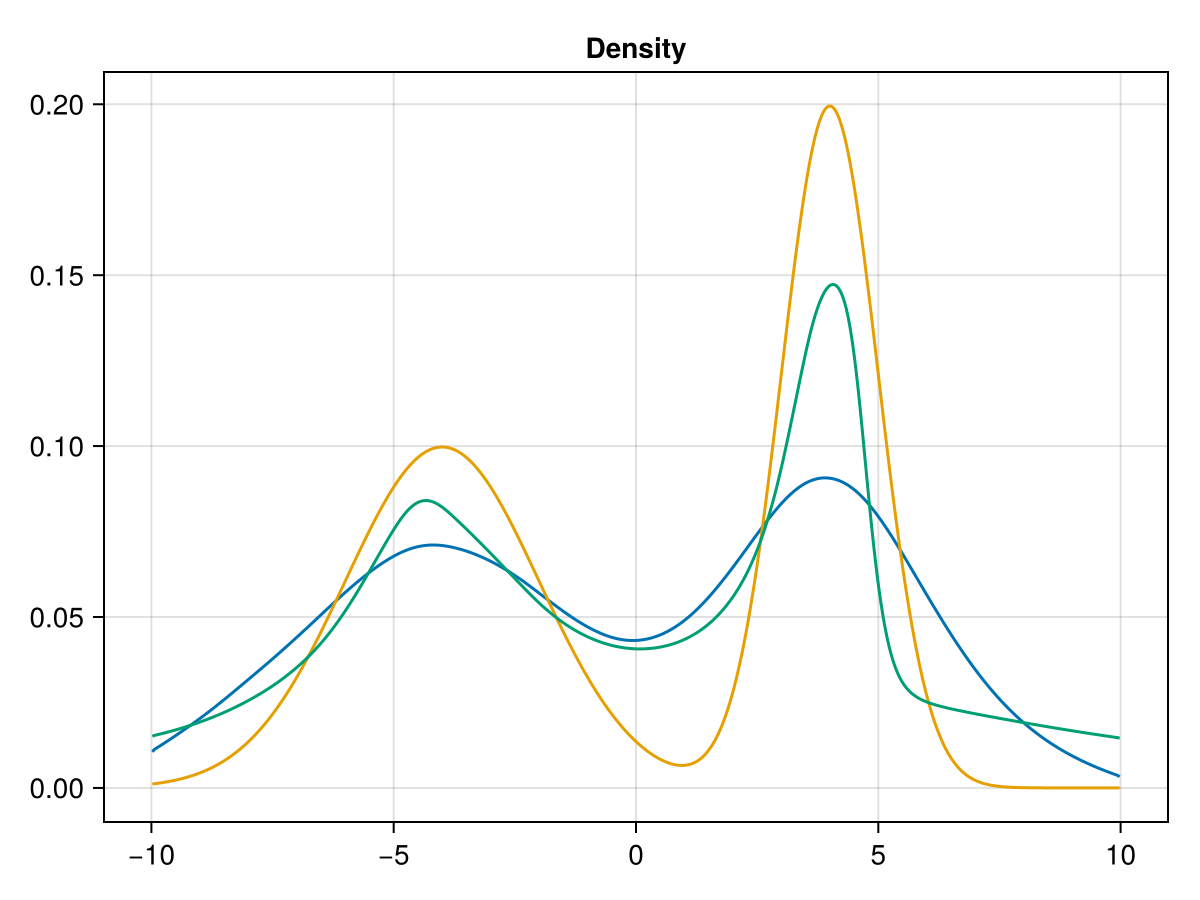

CairoMakie.Screen{IMAGE}


In [21]:
fig = Figure()
ax = Axis(fig[1,1], title="Density")
lines!(ax, xi1D[1],dens1D)
lines!(ax, xi1D[1],gaussiansol)
lines!(ax, xi1D[1],dens1D1)
display(fig)

In [22]:
NX1D=500
LX1D=40
xleft1D=-20
dx1D=LX1D/(NX1D)

xg1D = xleft1D+dx1D/2:dx1D:xleft1D+LX1D
mask1D,pm1D,xi1D = DIVAnd.DIVAnd_rectdom(xg1D)



xa=randn(100).+10
xb=2*randn(100).-10.
xo=[xa...,xb...]

inflation=ones(size(xo))

dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0)
dens1D1,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,1;Ladaptiveiterations=0)
dens1D1i,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,1.3;Ladaptiveiterations=1)

gaussiansol=0.5/sqrt(2*pi)*exp.(-0.5*((xi1D[1].-10).^2.0))+0.5/(2*sqrt(2*pi))*exp.(-0.5*(((xi1D[1].+10)./2).^2.0));

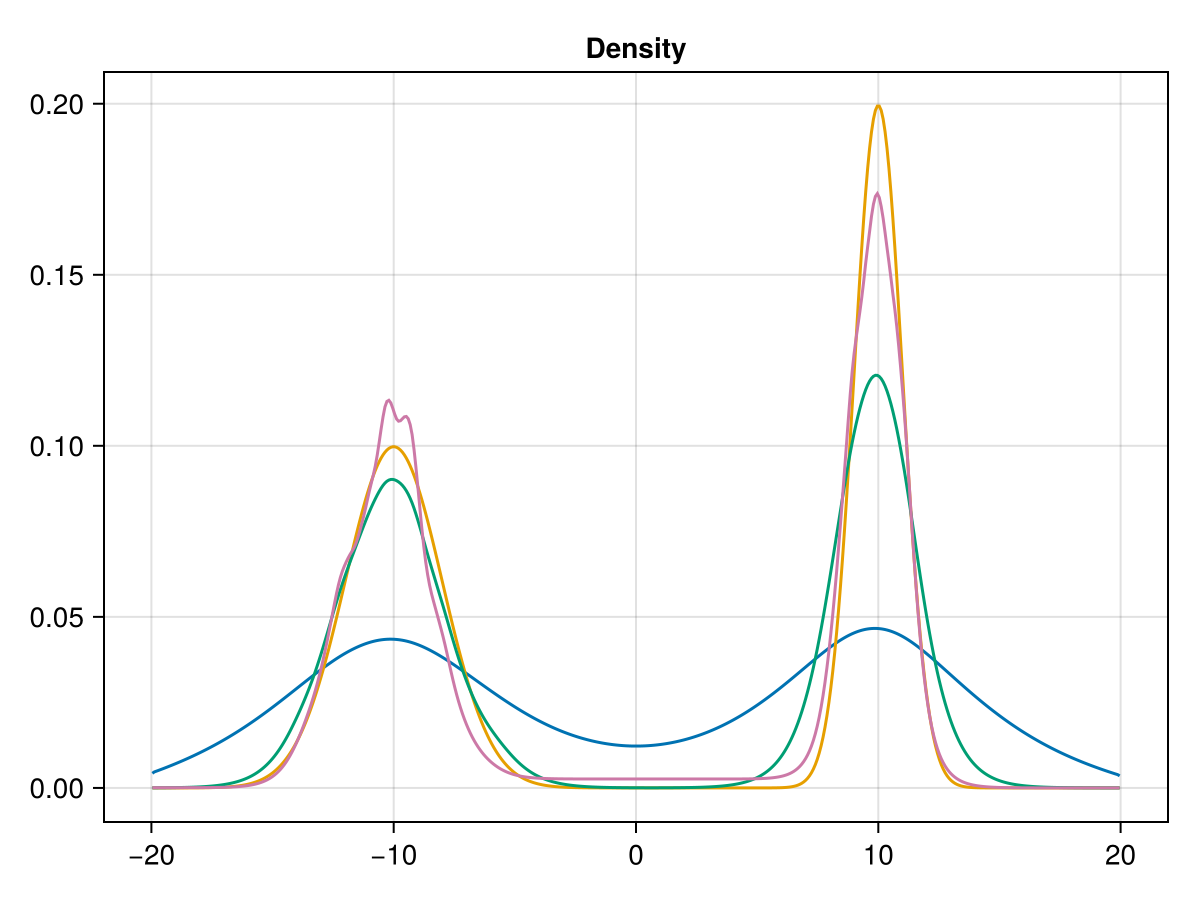

CairoMakie.Screen{IMAGE}


In [23]:
fig = Figure()
ax = Axis(fig[1,1], title="Density")
lines!(ax, xi1D[1],dens1D)
lines!(ax, xi1D[1],gaussiansol)
lines!(ax, xi1D[1],dens1D1)
lines!(ax, xi1D[1],dens1D1i)
display(fig)

## Some effects of Boundary Conditions 
(uniform data in 0-1)

In [24]:
NX1D=500
LX1D=1
xleft1D=0
dx1D=LX1D/(NX1D)

xg1D = xleft1D+dx1D/2:dx1D:xleft1D+LX1D
mask1D,pm1D,xi1D = DIVAnd.DIVAnd_rectdom(xg1D)

xo=rand(1000)

inflation=ones(size(xo))
mask1D[1]=false
#mask1D[end]=false
dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0)
dens1D1,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0,alphabc=0)
#dens1D1i= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0.5;Ladaptiveiterations=10)
#dens1D[mask1D.==false].=NaN
#dens1D1[mask1D.==false].=NaN

([NaN, 0.929234265422898, 0.9292284809575508, 0.929216384387574, 0.9291967930926558, 0.9291683170717154, 0.9291312114758258, 0.9290842478893468, 0.9290282472112821, 0.9289646338831123  …  0.9829650409512776, 0.9826623014137843, 0.9823925042909641, 0.9821567362256682, 0.981955025148952, 0.9817857667277226, 0.9816479765710241, 0.9815425727904877, 0.9814703605948957, 0.9814334427878353], (0.07534510662491099,), 3.61770871209012e-7, -0.9980199170731177)

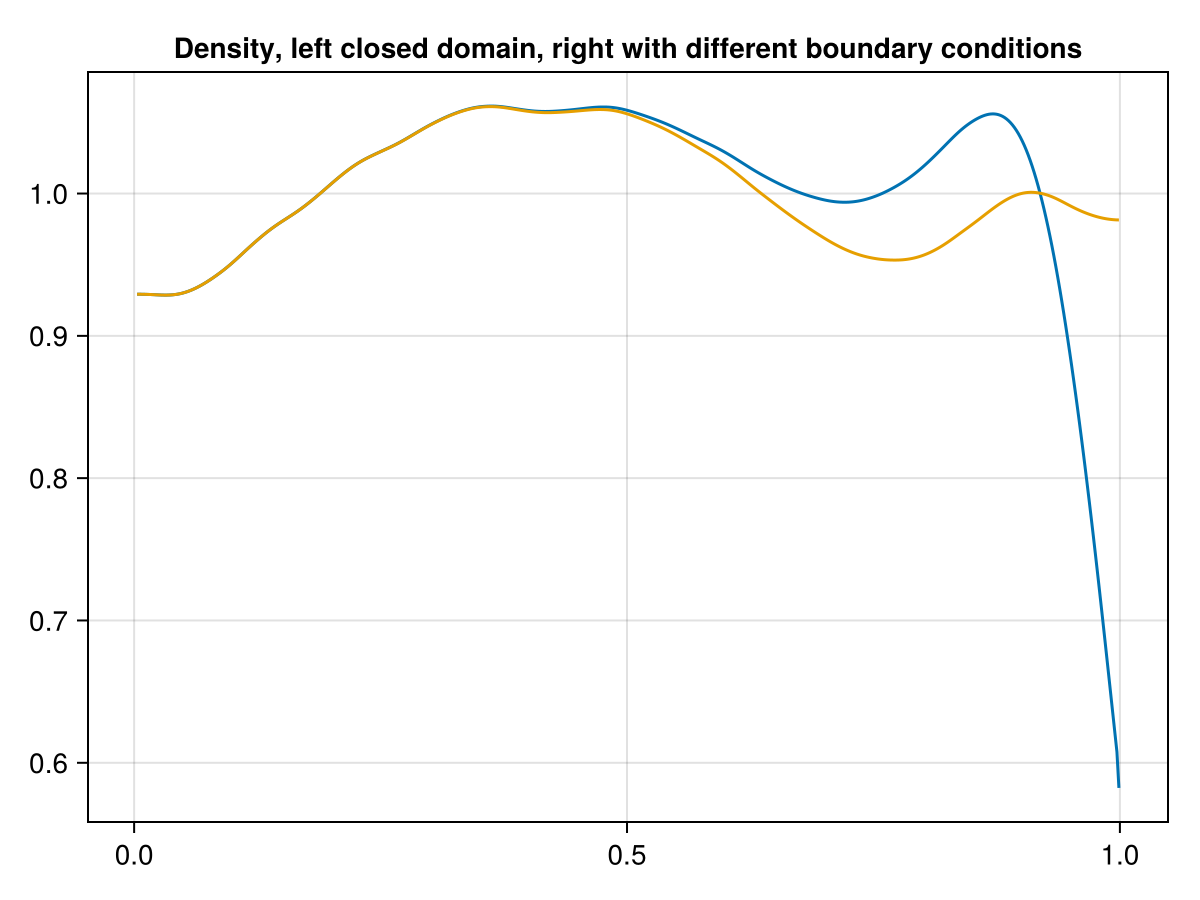

CairoMakie.Screen{IMAGE}


In [25]:
fig = Figure()
ax = Axis(fig[1,1], title="Density, left closed domain, right with different boundary conditions")
lines!(ax, xi1D[1],dens1D)
lines!(ax, xi1D[1],dens1D1)
display(fig)

In [26]:
dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0.3;Ladaptiveiterations=0)
dens1D1,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0.3;Ladaptiveiterations=0,alphabc=0)
#dens1D1i= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0.5;Ladaptiveiterations=10)
#dens1D[mask1D.==false].=NaN
#dens1D1[mask1D.==false].=NaN

([NaN, 0.996276737159993, 0.9962782904345713, 0.9962813947370939, 0.9962860450727811, 0.9962922354910729, 0.9962999664696781, 0.996309232463661, 0.9963200359732407, 0.9963323817829364  …  0.9948056661577677, 0.9948003020530826, 0.9947955232948386, 0.9947913369760538, 0.9947877456313478, 0.9947847449534929, 0.9947823327689537, 0.9947805141495784, 0.9947792933842585, 0.994778679582291], 0.3, 0.0016117196035403932, -1.0012256489604103)

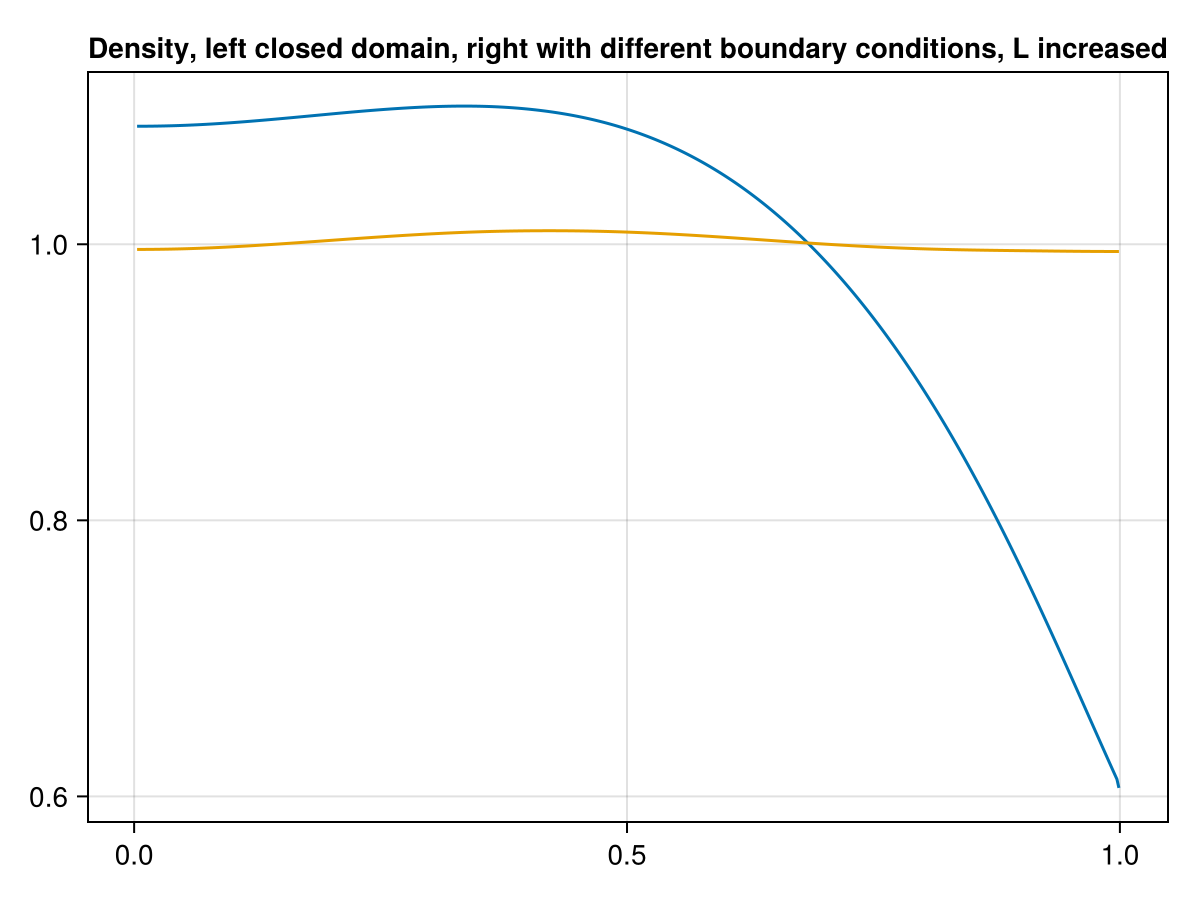

CairoMakie.Screen{IMAGE}


In [27]:
fig = Figure()
ax = Axis(fig[1,1], title="Density, left closed domain, right with different boundary conditions, L increased")
lines!(ax, xi1D[1],dens1D)
lines!(ax, xi1D[1],dens1D1)
display(fig)